<a href="https://colab.research.google.com/github/vinita2000/Data-Analytics-with-Pandas/blob/master/PoliceCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
#importing libraries and csv data
import numpy as np
import pandas as pd
import datetime as dt
data = pd.read_csv("/content/police.csv")
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [129]:
#understading data in the file
data.shape
data.dtypes
data.isnull().sum()
data.dropna(axis='columns', inplace=True, how='all')
data.isna()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_curr_age
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
#Do men or women speed more often?
speedingdf = data.loc[data.violation_raw == 'Speeding']
speedingdf.head()
genderGroupdf = speedingdf.groupby(by = 'driver_gender')['driver_gender'].size()
genderGroupdf.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
#Does gender affect who gets searched during a stop?¶
data['search_conducted'].value_counts()
searchdf = data.loc[data.search_conducted == True][['search_conducted', 'driver_gender']]
s_grpdf = searchdf.groupby('driver_gender').size()
s_grpdf.head()

data.search_type.isnull().sum()
data.search_type.value_counts(dropna = False)
data['frisk'] = data.search_type.str.contains('Protective Frisk')
data['frisk'].value_counts(dropna=False)


driver_gender
F     471
M    2725
dtype: int64

In [2]:
#Which year had the least number of stops?
data['year'] = pd.DatetimeIndex(data['stop_date']).year
data['year'].value_counts(dropna=False)
y_grpdf = data.groupby('year').size()
y_grpdf.sort_values( ascending=False, inplace=True)
y_grpdf.head()


year
2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
dtype: int64

Axes(0.125,0.11;0.775x0.77)


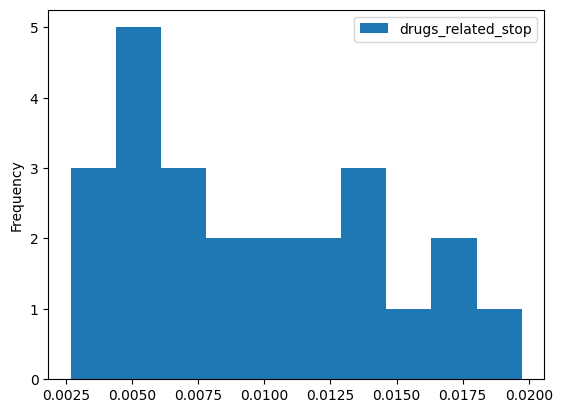

In [33]:
#How does drug activity change by time of day?¶
data['date_time'] = data['stop_date'].str.cat(data['stop_time'], sep=' ')
data['date_time'] = pd.to_datetime(data['date_time'])
hr_grpdf = data.groupby(data['date_time'].dt.hour)[['drugs_related_stop']].mean().plot()
print(hr_grpdf)

<Axes: xlabel='stop_time'>

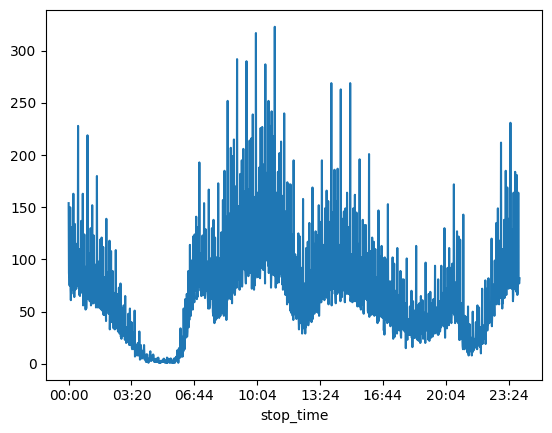

In [40]:
#Do most stops occur at night?
data.groupby(data['stop_time'])[['stop_time']].value_counts().sort_index().plot()

In [46]:
#Find the bad data in the stop_duration column and fix it
data['stop_duration'].value_counts(dropna=False)
data['stop_duration'].fillna('unknow', inplace=True)
data['stop_duration'].value_counts(dropna=False)

stop_duration
0-15 Min     69543
16-30 Min    13635
unknow        5333
30+ Min       3228
2                1
1                1
Name: count, dtype: int64

<Axes: xlabel='violation_raw'>

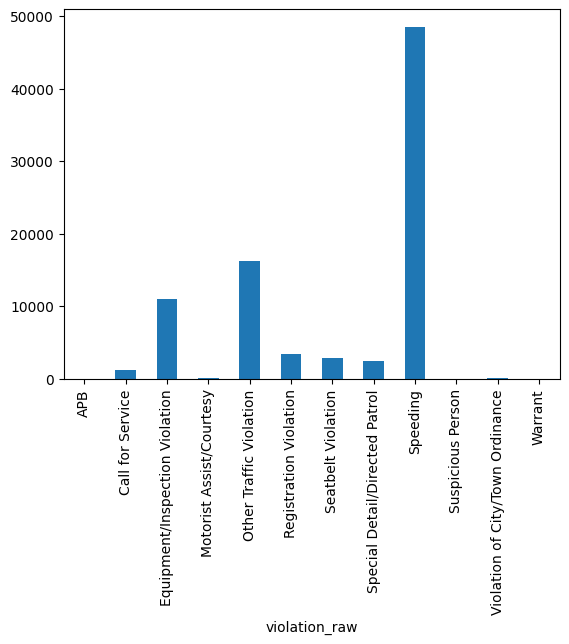

In [72]:
#What is the mean stop_duration for each violation_raw?
data.groupby(data['stop_duration']).size().sort_values(ascending=True)
#to be able to sort on index need to map indexes to numbers
durationMap = {'1': 1, '2': 2, '30+ Min': 35, 'unknow': -1, '16-30 Min': 25, '0-15 Min': 10}
data['stop_minutes'] = data['stop_duration'].map(durationMap)
data.groupby(data['stop_minutes']).size().sort_index(ascending=True)
vio_grpdf = data.groupby(data['violation_raw'])[['stop_minutes']].agg(['mean', 'count'])
vio_grpdf['stop_minutes']['count'].plot(kind='bar')
vio_grpdf['stop_minutes']['mean'].plot(kind='bar')

<Axes: xlabel='violation'>

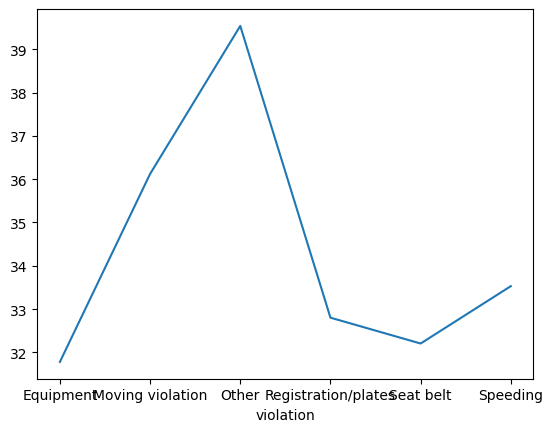

In [95]:
#Compare the age distributions for each violation
age_grpdf = data.groupby('violation')[['driver_age']].describe()
age_grpdf.head()
age_grpdf['driver_age']['mean'].plot()
data.driver_age.value_counts().sort_index().plot()

In [79]:
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,date_time,stop_minutes
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-02 01:55:00,10
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-18 08:15:00,10
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-23 23:15:00,10
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,2005-02-20 17:15:00,25
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-03-14 10:00:00,10


In [100]:
#Replacing country NaN values
data['county_name'].fillna("Unknown", inplace=True)
data['county_name'].value_counts(dropna=False)

county_name
Unknown    91741
Name: count, dtype: int64

array([[<Axes: title={'center': 'Equipment'}>,
        <Axes: title={'center': 'Moving violation'}>],
       [<Axes: title={'center': 'Other'}>,
        <Axes: title={'center': 'Registration/plates'}>],
       [<Axes: title={'center': 'Seat belt'}>,
        <Axes: title={'center': 'Speeding'}>]], dtype=object)

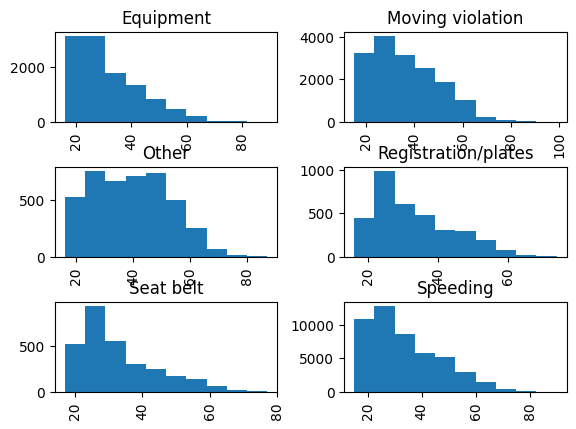

In [104]:
data.hist('driver_age', by='violation')

In [116]:
#Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)
curr_year = dt.datetime.now().year
data['driver_curr_age'] = curr_year - data['driver_age_raw']


In [128]:
#underage drivers
data.loc[data['driver_age']<18].shape
#oldage drivers
data.loc[data['driver_age']> 60].shape

(3058, 16)